### Import Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#using retina display for Mac
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from matplotlib import style
style.use('ggplot')

# to suppress warningss
from warnings import filterwarnings
filterwarnings('ignore')

# setting the plot size for graphs:
plt.rcParams['figure.figsize'] = (8,6)

In [17]:
%cd ..

/Users/fredwu/Documents/MentorX/Clustering


In [2]:
df = pd.read_csv('./credit_card.csv')
df.head(n=5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Exploration

In [8]:
print('------------------- data shape --------------------')
print(df.shape)
print('------------------- data type & data covergage --------------------')
df.info()
print('------------------- data summarization --------------------')
df.describe()

------------------- data shape --------------------
(8950, 18)
------------------- data type & data covergage --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  C

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
# Data Summary for continuous variables:

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [10]:
num_features = df.select_dtypes([np.number])
num_features.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [11]:
# Summary Statistics for Categorical Variables: 

df.describe(exclude=[np.number])

,CUST_ID
count,8950
unique,8950
top,C17474
freq,1


In [12]:
# dropping Customer Id as is unique and not needed for model building:
df.drop('CUST_ID', axis=1, inplace=True)

### Checking on missig values

In [13]:
# Checking for Missing Values

# use isnull().sum() to check for missing values and creating a dataframe to concatenate the missing values

count_missing = df.isnull().sum() 

percent_missing = (df.isnull().sum()/len(df))*100

missing_values = pd.concat([percent_missing,count_missing], axis=1,
                           keys=['Percent_of_Missing_Values', 'Count_of_Missing_Values'])
missing_values

,Percent_of_Missing_Values,Count_of_Missing_Values
BALANCE,0.000000,0
BALANCE_FREQUENCY,0.000000,0
PURCHASES,0.000000,0
ONEOFF_PURCHASES,0.000000,0
INSTALLMENTS_PURCHASES,0.000000,0
CASH_ADVANCE,0.000000,0
PURCHASES_FREQUENCY,0.000000,0
ONEOFF_PURCHASES_FREQUENCY,0.000000,0
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0
CASH_ADVANCE_FREQUENCY,0.000000,0


In [14]:
# checking the value which is Null for Credit Limit
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [15]:
df = df.drop(5203)

In [16]:
# resetting the index after dropping the record:
df = df.reset_index(drop=True)

In [17]:
# Impute Using Median for Minimum Payments

df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [18]:

# Checking again to confirm if missing values are present or not:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Outlier detection

In [19]:
num_vars = df.columns
num_vars

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

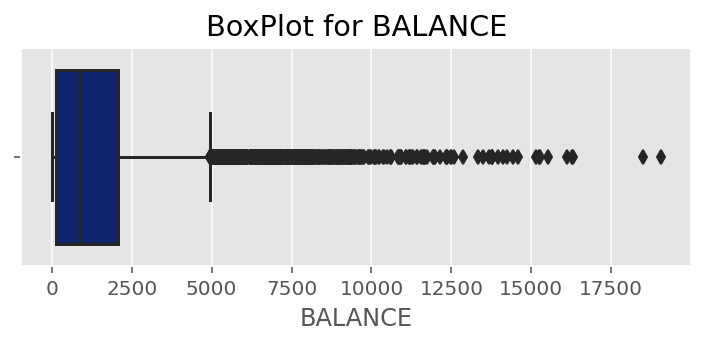

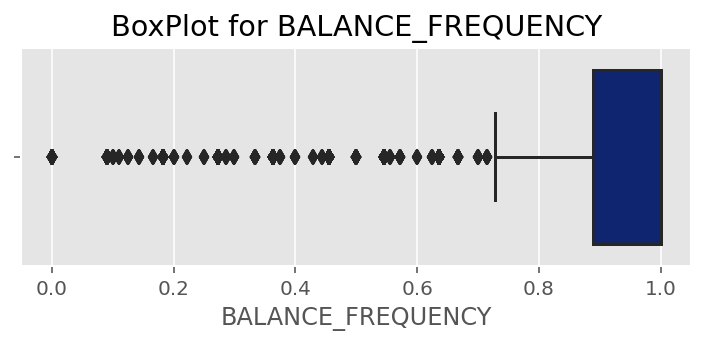

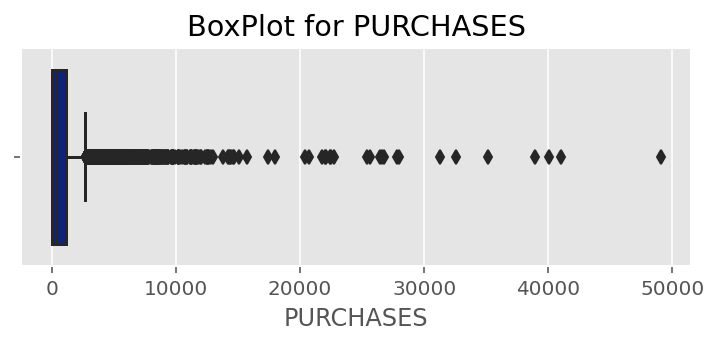

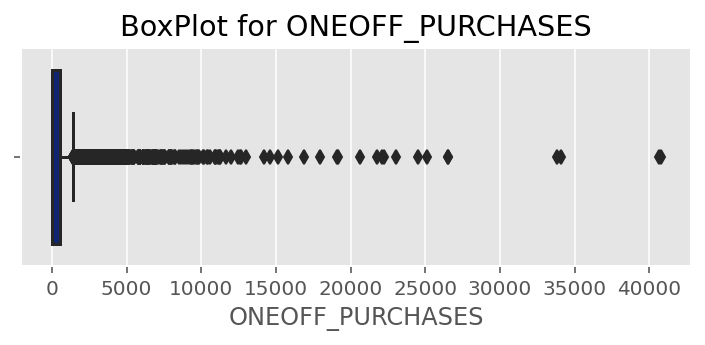

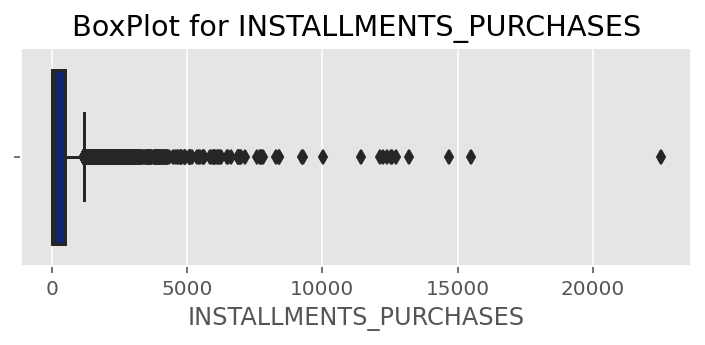

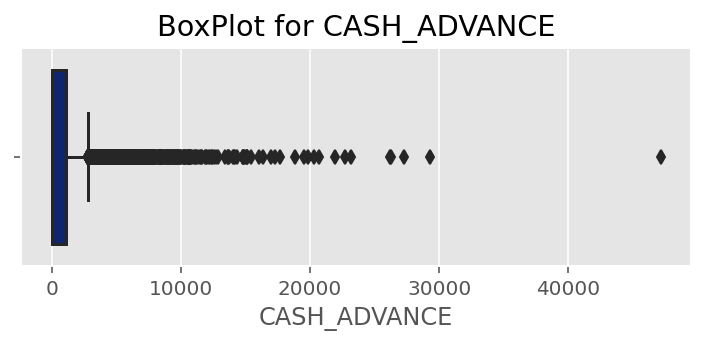

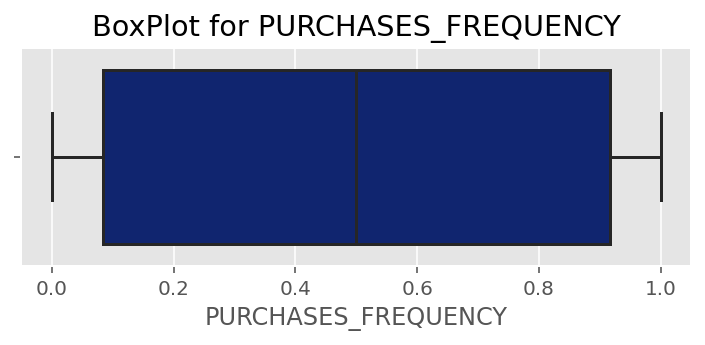

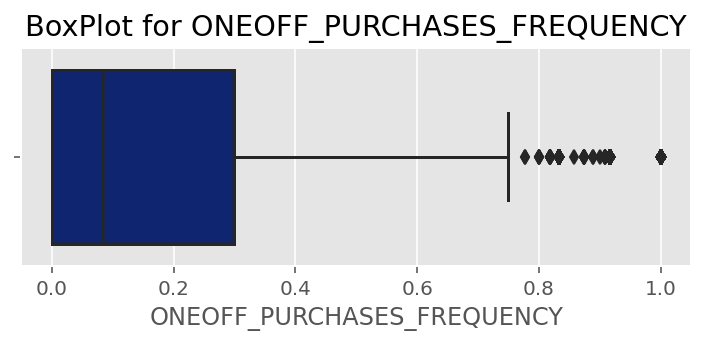

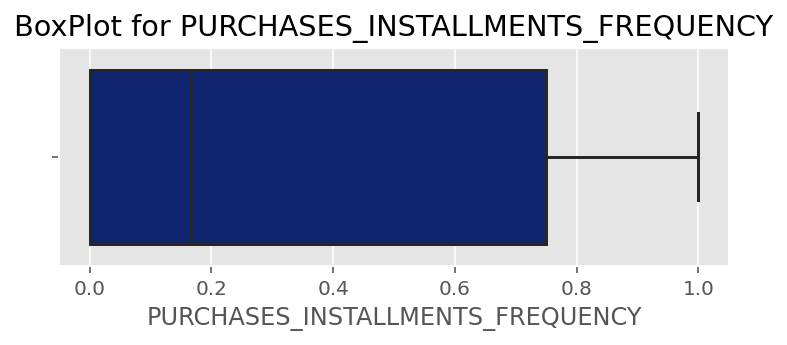

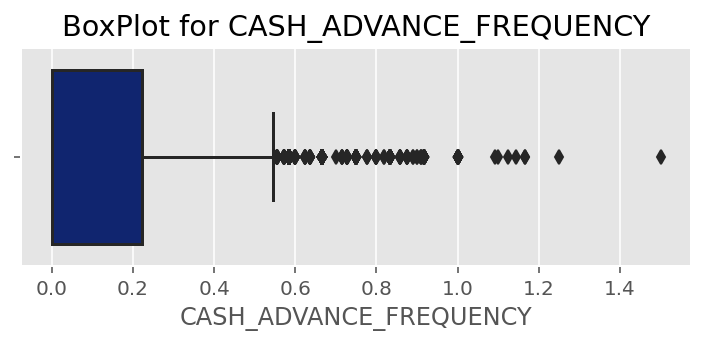

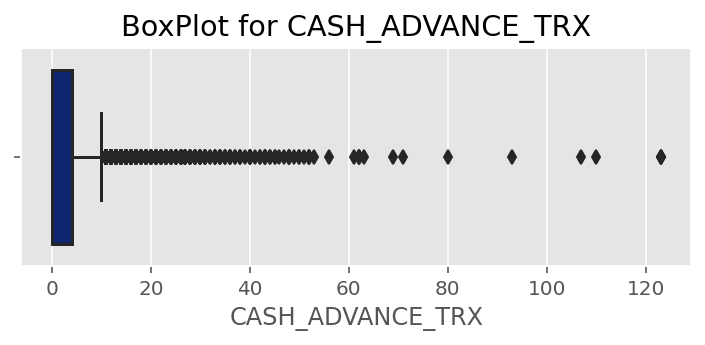

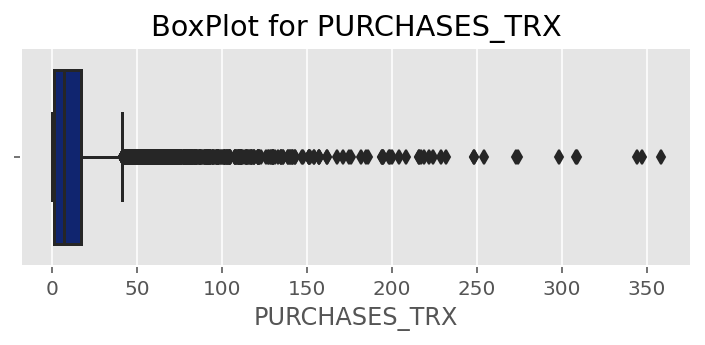

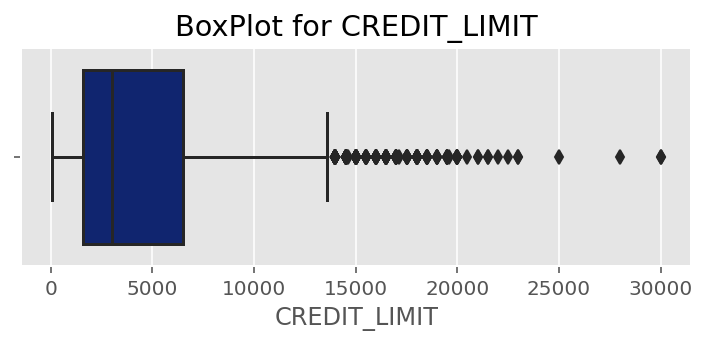

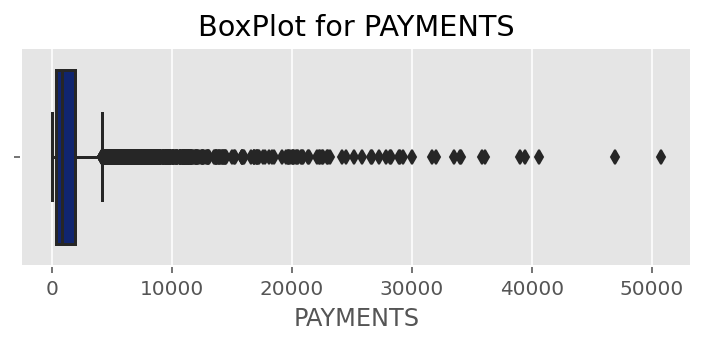

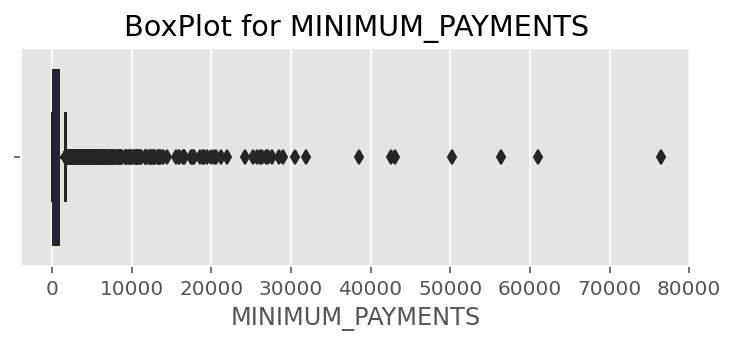

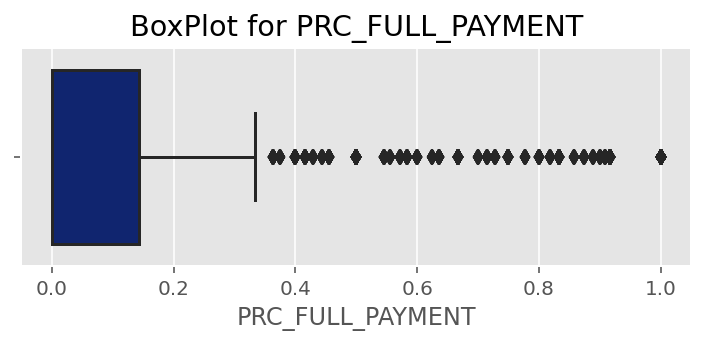

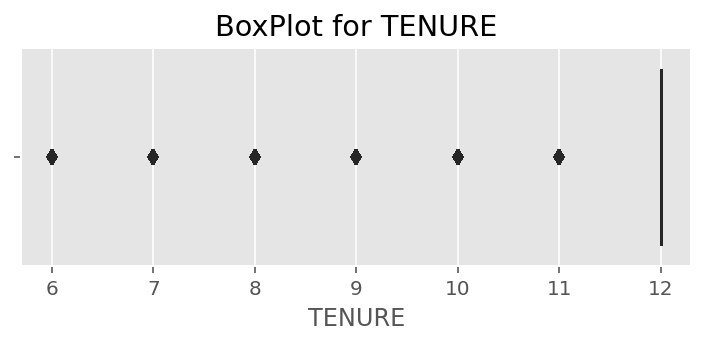

In [20]:
plt.rcParams['figure.figsize'] = (6,2)
# Box Plot:
for i in num_vars:
    sns.boxplot(df[i], palette='dark')
    plt.title('BoxPlot for {}'.format(i))
    plt.show()

In [22]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer()
print(PT.fit_transform(df))

[[-1.23833786 -1.0801604  -0.36831098 ... -0.82502551 -0.67793662
   0.42210751]
 [ 1.05188287 -0.4256199  -1.50536123 ...  0.91748237  1.23484635
   0.42210751]
 [ 0.86050618  0.62852726  0.52149237 ...  0.4759187  -0.67793662
   0.42210751]
 ...
 [-1.40957025 -0.9921333  -0.21655169 ... -1.30177584  1.32828513
  -2.52719186]
 [-1.55874115 -0.9921333  -1.50536123 ... -1.66214063  1.32828513
  -2.52719186]
 [-0.32454944 -1.6469605   0.70189133 ... -1.23886969 -0.67793662
  -2.52719186]]


### Feature Engineering

In [24]:
# adding Monthly Average Purchase to the df 
df['Monthly_Avg_Purchase'] = df['PURCHASES']/df['TENURE']

In [26]:
# adding Monthly Average Cash Advance Amount to the df 
df['Monthly_Avg_Cash'] = df['CASH_ADVANCE']/df['TENURE']

In [27]:
df_purchases = df[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]
df_purchases

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8944,0.00,291.12
8945,0.00,300.00
8946,0.00,144.40
8947,0.00,0.00


In [28]:
df_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ONEOFF_PURCHASES        8949 non-null   float64
 1   INSTALLMENTS_PURCHASES  8949 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [29]:
df['Purchase_Type'] = np.where((df['ONEOFF_PURCHASES'] == 0) & (df['INSTALLMENTS_PURCHASES'] == 0),'None_Of_the_Purchases',
                    np.where((df['ONEOFF_PURCHASES'] > 0) & (df['INSTALLMENTS_PURCHASES'] == 0), 'One_Of_Purchase',
np.where((df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0),'Installment_Purchases','Both_the_Purchases')))

In [30]:
df['Purchase_Type'] .value_counts()

Both_the_Purchases       2774
Installment_Purchases    2260
None_Of_the_Purchases    2041
One_Of_Purchase          1874
Name: Purchase_Type, dtype: int64

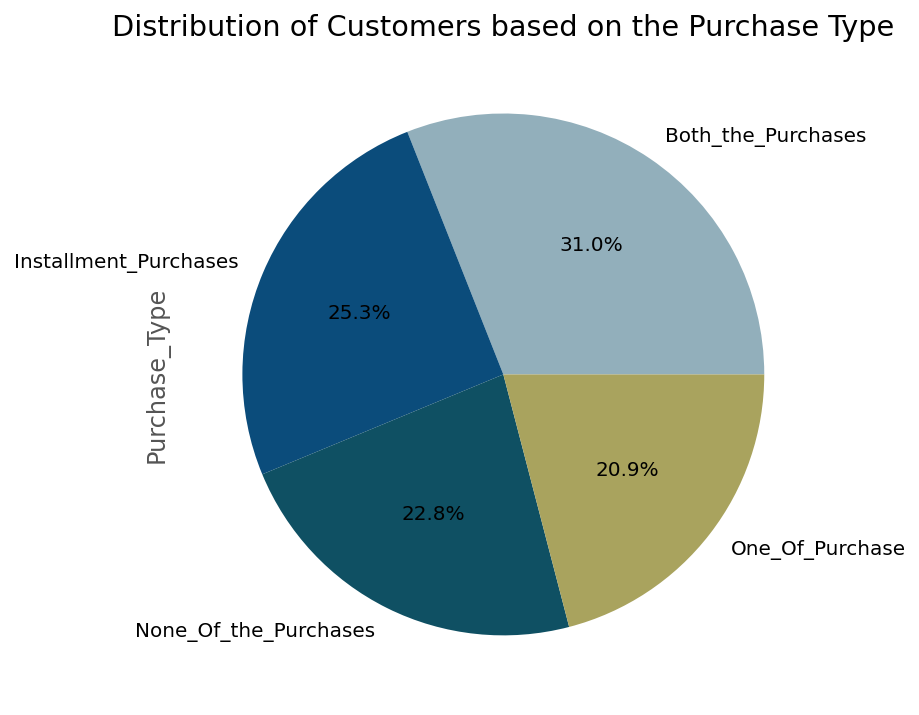

In [34]:
# Plotting the distribution of customer on basis of Purhcase Type
plt.rcParams['figure.figsize'] = (8,6)
df['Purchase_Type'].value_counts().sort_index().plot(kind='pie',autopct='%1.01f%%', 
                     colors =['#92afbb','#0b4c7b','#0f5063','#a9a35e'],fontsize=10,textprops = {'fontsize': 18})
plt.title('Distribution of Customers based on the Purchase Type')
plt.show()

In [35]:
df['Limit_Usage'] = df['BALANCE']/df['CREDIT_LIMIT']
df['Limit_Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8944    0.028494
8945    0.019183
8946    0.023399
8947    0.026915
8948    0.310590
Name: Limit_Usage, Length: 8949, dtype: float64

In [37]:
df['Pay_to_MinimumPay'] = df['PAYMENTS']/df['MINIMUM_PAYMENTS']
df['Pay_to_MinimumPay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8944    6.660231
8945    0.882891
8946    0.986076
8947    0.942505
8948    0.715439
Name: Pay_to_MinimumPay, Length: 8949, dtype: float64

In [38]:
# Step1: Find the average of Pay_to_MinimumPay for each of the Purchase Type 

t1 = df.groupby(by=['Purchase_Type'])['Pay_to_MinimumPay'].mean().sort_values(ascending=False)
t1

Purchase_Type
Installment_Purchases    13.258996
None_Of_the_Purchases    10.092080
Both_the_Purchases        7.236979
One_Of_Purchase           5.571042
Name: Pay_to_MinimumPay, dtype: float64

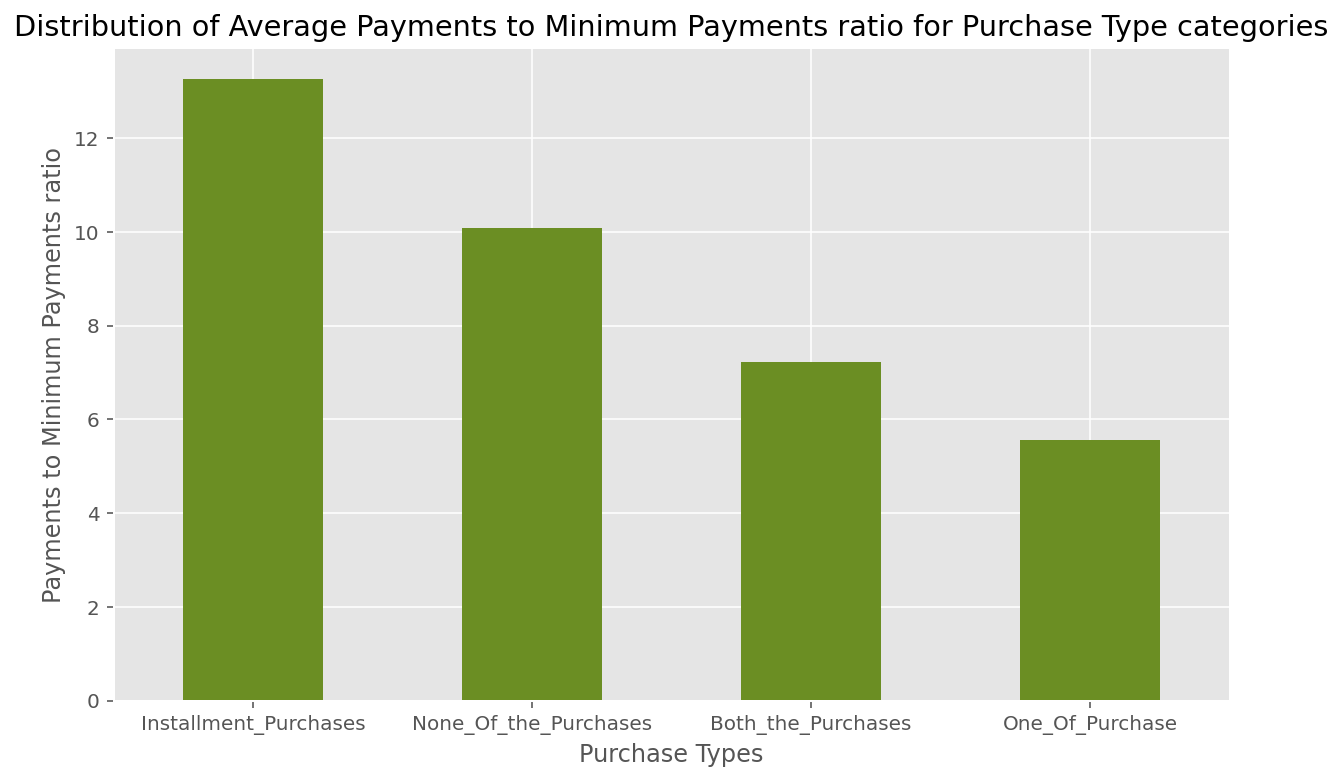

In [40]:
# Step 2: Plot the graph
plt.rcParams['figure.figsize'] = (10,6)
t1.plot(kind='bar',color='olivedrab')
plt.title('Distribution of Average Payments to Minimum Payments ratio for Purchase Type categories')
plt.xlabel('Purchase Types')
plt.ylabel('Payments to Minimum Payments ratio')
plt.xticks(rotation=0)
plt.show()

In [41]:
# Step 1: Find the average of Limit Usage i.e of the credit card score for each of the Purchase Type:

t2 = df.groupby(['Purchase_Type'])['Limit_Usage'].mean().sort_values(ascending = True).reset_index()
t2

,Purchase_Type,Limit_Usage
0,Installment_Purchases,0.271678
1,Both_the_Purchases,0.353548
2,One_Of_Purchase,0.381074
3,None_Of_the_Purchases,0.574049


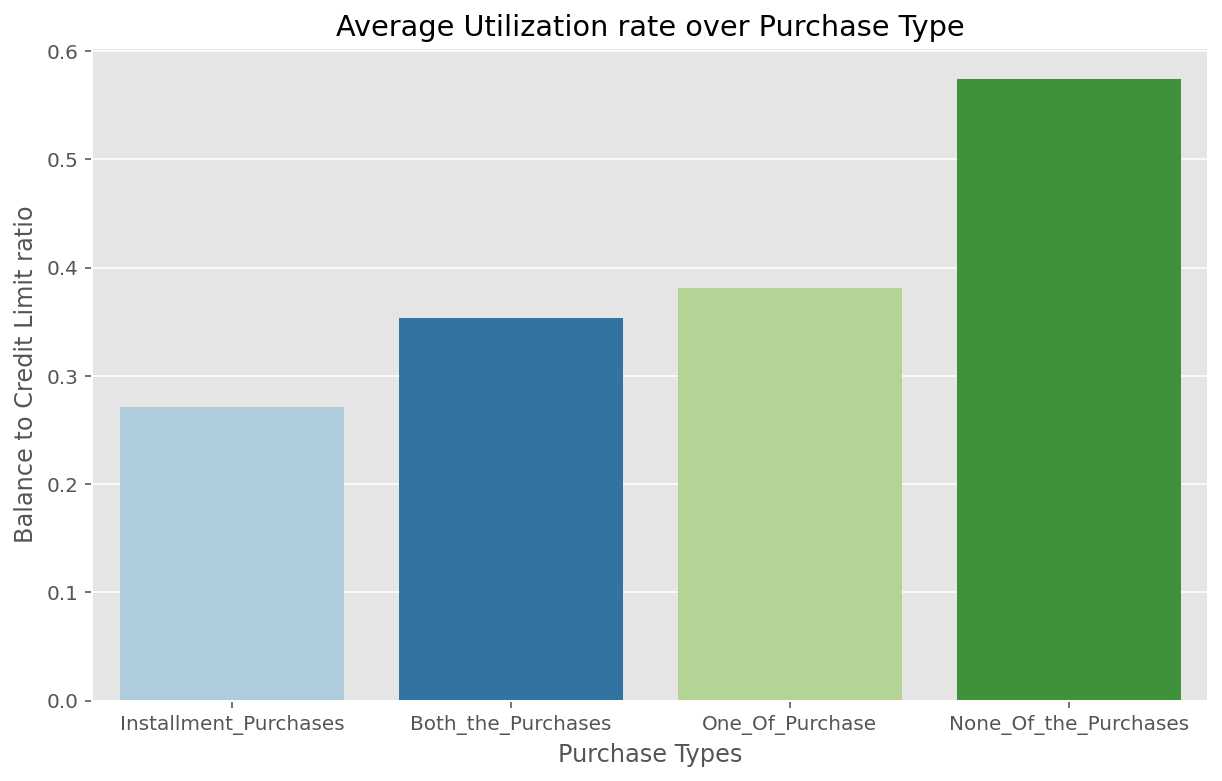

In [42]:
# Step 2: Plot the graph of Average Utilization rate over Purchase type

sns.barplot(t2['Purchase_Type'], t2['Limit_Usage'], palette='Paired')
plt.title('Average Utilization rate over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Balance to Credit Limit ratio')
plt.show()

In [43]:
df1 = df.copy()
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Purchase_Type,Limit_Usage,Pay_to_MinimumPay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment_Purchases,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None_Of_the_Purchases,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_Of_Purchase,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,One_Of_Purchase,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_Of_Purchase,0.681429,2.771075


In [44]:
t3 = df.groupby(by=['Purchase_Type'])['Monthly_Avg_Purchase'].mean().sort_values(ascending=False) 
t3

Purchase_Type
Both_the_Purchases       192.685172
One_Of_Purchase           69.688958
Installment_Purchases     46.974347
None_Of_the_Purchases      0.000000
Name: Monthly_Avg_Purchase, dtype: float64

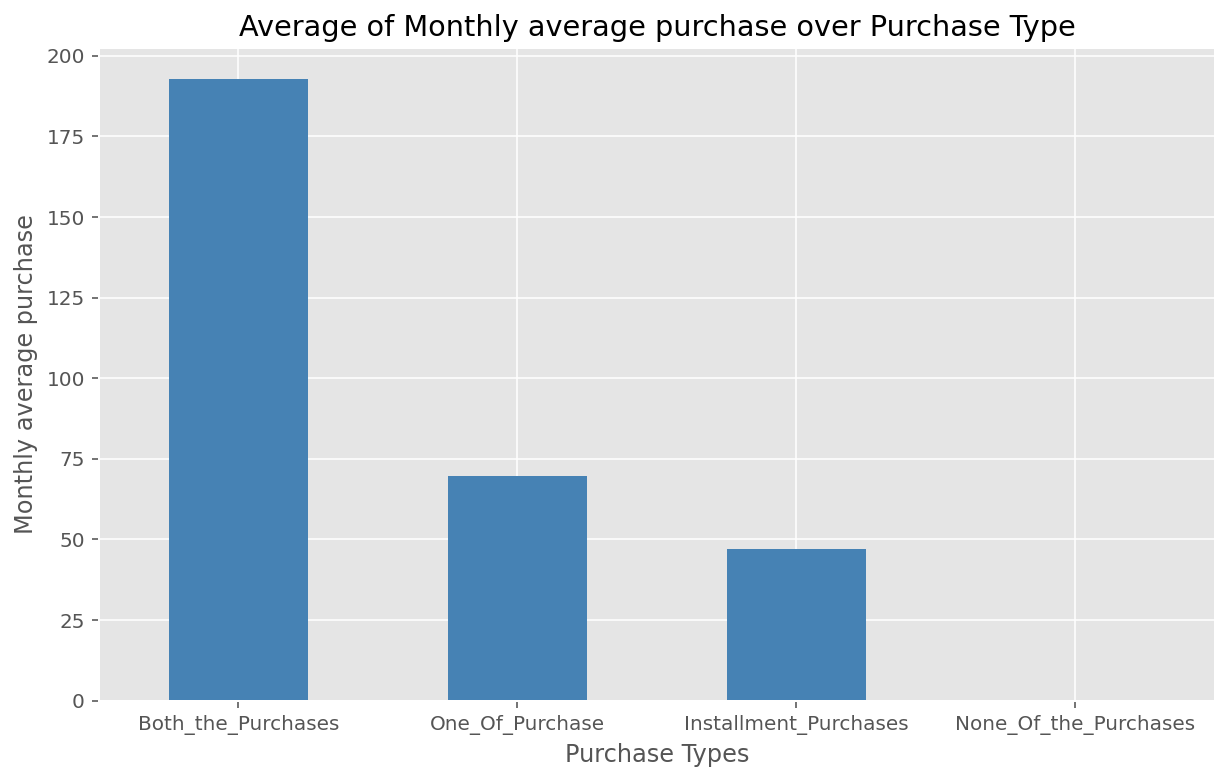

In [45]:
t3.plot(kind='bar',color='steelblue')
plt.title('Average of Monthly average purchase over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly average purchase')
plt.xticks(rotation=0)
plt.show()

In [46]:
t4 = df.groupby(['Purchase_Type'])['Monthly_Avg_Cash'].mean().sort_values(ascending=False).reset_index()
t4

,Purchase_Type,Monthly_Avg_Cash
0,None_Of_the_Purchases,182.932504
1,One_Of_Purchase,78.995966
2,Both_the_Purchases,67.821985
3,Installment_Purchases,38.398206


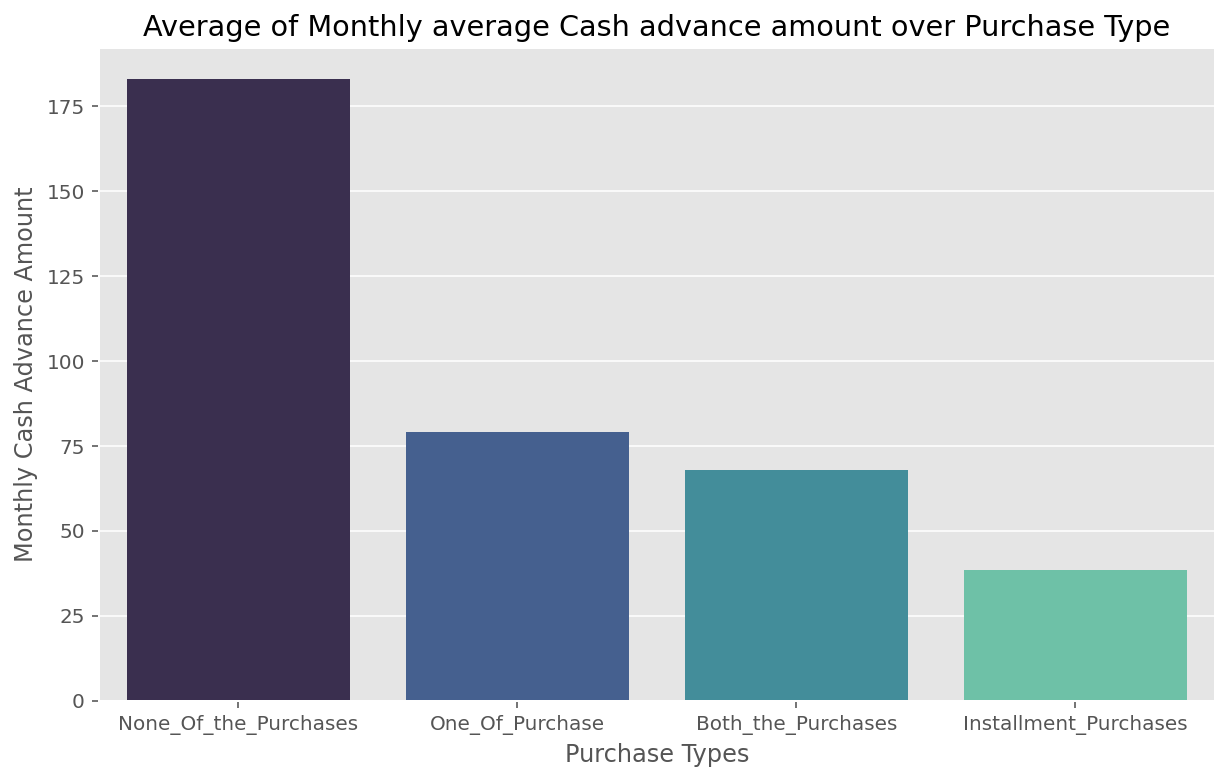

In [47]:
sns.barplot(t4['Purchase_Type'], t4['Monthly_Avg_Cash'], palette='mako')
plt.title('Average of Monthly average Cash advance amount over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Cash Advance Amount')
plt.show()

In [48]:
df.drop(['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'], axis=1, inplace=True)

In [49]:
corr_df = df.corr()
corr_df

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
BALANCE_FREQUENCY,1.000000,0.104257,0.124204,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,-0.095308,0.131188,0.085963,0.404557,-0.089340
ONEOFF_PURCHASES,0.104257,1.000000,0.330610,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.132745,0.913059,-0.034557,-0.042254,0.010298
INSTALLMENTS_PURCHASES,0.124204,0.330610,1.000000,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.182548,0.677016,-0.067799,-0.058318,0.020618
PURCHASES_FREQUENCY,0.229440,0.264913,0.442398,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.305761,0.395310,-0.215846,-0.201944,0.011399
ONEOFF_PURCHASES_FREQUENCY,0.202295,0.524881,0.214016,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.157497,0.499694,-0.089059,-0.092089,-0.004556
PURCHASES_INSTALLMENTS_FREQUENCY,0.175869,0.127699,0.511334,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.250049,0.314106,-0.179373,-0.161536,0.017915
CASH_ADVANCE_FREQUENCY,0.192022,-0.082622,-0.132312,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,-0.249768,-0.116102,0.628321,0.360168,-0.021861
CASH_ADVANCE_TRX,0.141516,-0.046226,-0.074017,-0.203541,-0.069116,-0.169250,0.799573,1.000000,-0.066180,-0.169807,-0.065716,0.633291,0.252596,-0.016119
PURCHASES_TRX,0.189527,0.545514,0.628097,0.568408,0.544849,0.529949,-0.131161,-0.066180,1.000000,0.162037,0.682573,-0.083411,-0.043794,0.013472
PRC_FULL_PAYMENT,-0.095308,0.132745,0.182548,0.305761,0.157497,0.250049,-0.249768,-0.169807,0.162037,1.000000,0.181755,-0.151386,-0.415701,0.018459


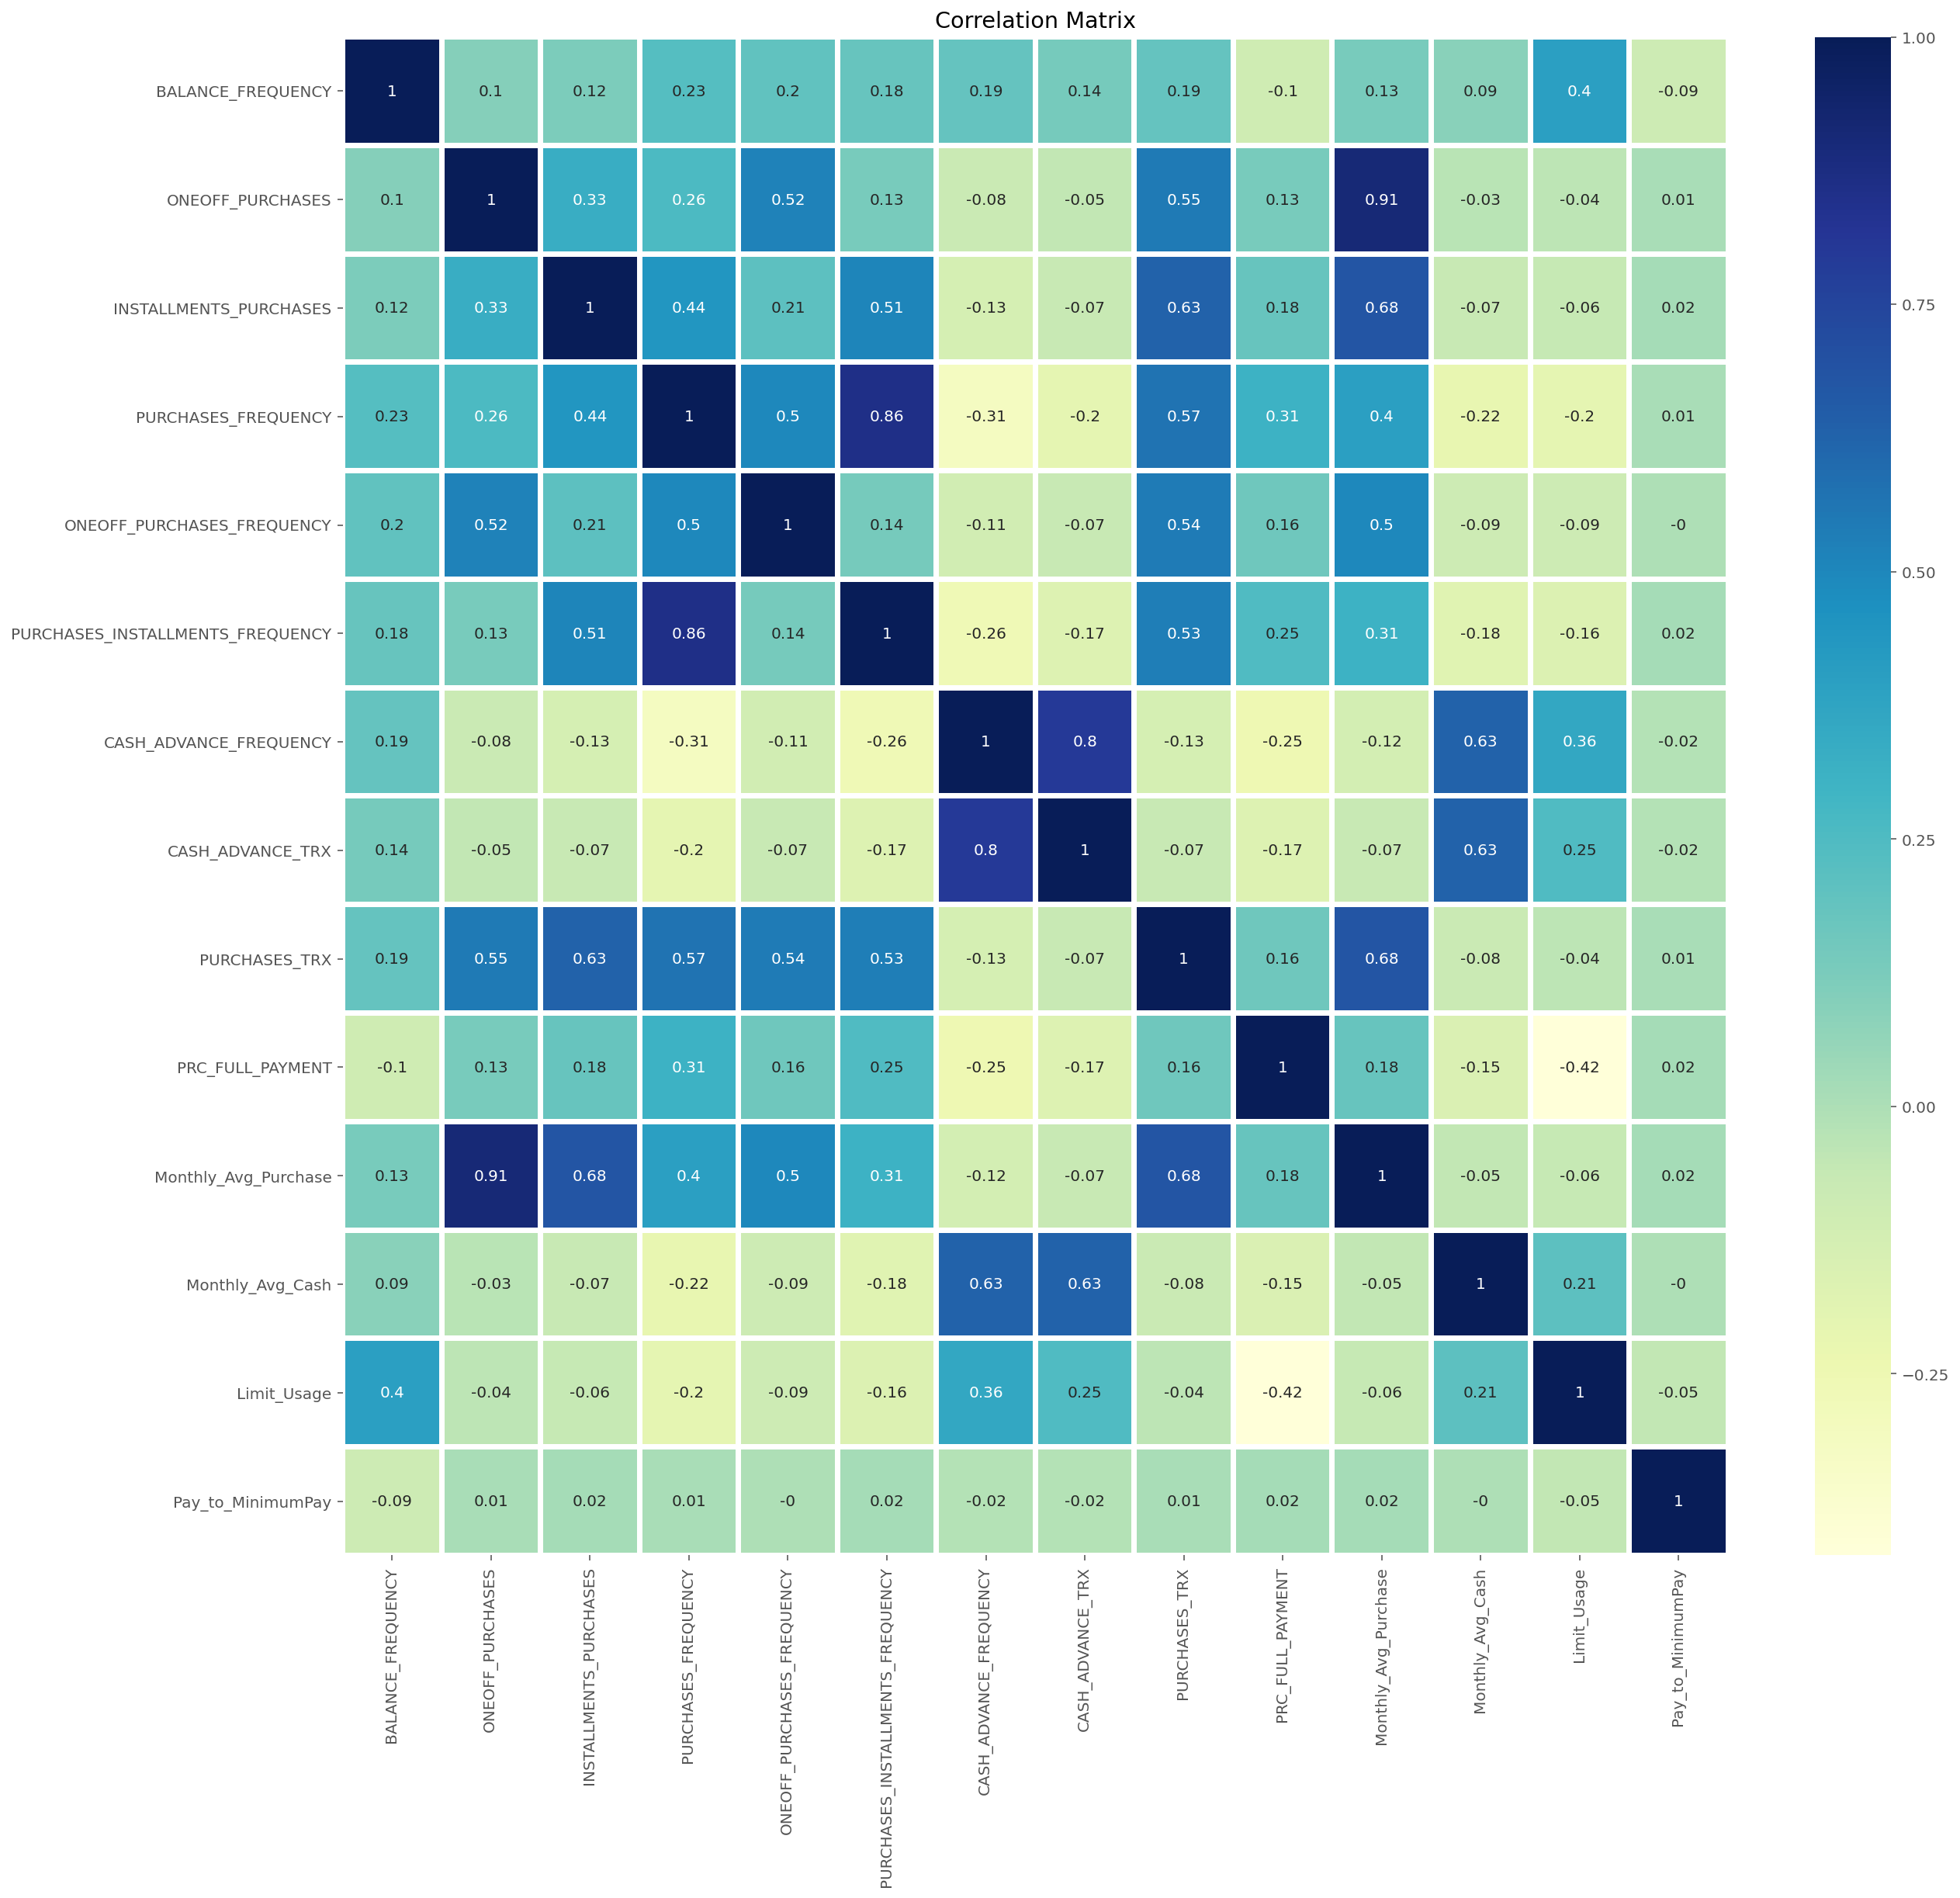

In [50]:
plt.figure(figsize=(20,18))
sns.heatmap(round(df.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

### Inference:
The correlation value above 0.50 is considered to be highly correlated. From the above heatmap, can observe the following:

1. OneOff_Purchases is highly positively correlated with Monthly_Avg_Purchase with 0.91 correlation.
2. Installment_Purchases is correlated with Purchases_Trx having a correlation of 0.63 and with Monthly_Avg_Purchase having a correlation of 0.68.
3. Purchases_Frequency is positively correlated with Purchases_Installment_Frequency with 0.86 correlation and also with Purchases_Trx having a correlation of 0.57.
4. Cash_Advance_Frequency is highly positively correlated with Cash_Advance_Trx  with correlation of 0.80 and with Monthly_Avg_Cash having a correlation of 0.63.
5. Cash_Advance_Trx is also positively correlated with Monthly_Avg_Cash with correlation of 0.63.
6. Purchases_Trx is positively correlated with Monthly_Avg_Purchase with 0.68 correlation.

In [53]:
# Creating dummy variables for Purchase_Type 

x_cat = pd.get_dummies(df['Purchase_Type'], drop_first=True)
x_cat

# using drop_first = True as will create one dimension less and the 4th category can be computed using the first 3 categories

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8944,1,0,0
8945,1,0,0
8946,1,0,0
8947,0,1,0


In [54]:
x_num = df.dtypes[df.dtypes != 'object'].index.to_list()
x_num

['BALANCE_FREQUENCY',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'PRC_FULL_PAYMENT',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [55]:
x_num_df1 = df1.dtypes[df1.dtypes != 'object'].index.to_list()
x_num_df1

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [56]:
# Original Variables Concatenated with dummy variables but without Scaling the Numerical variables :

original_df = pd.concat([x_cat, df1[x_num_df1]], axis=1)
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,0.222223,0.000000
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075


In [57]:
# Scaling the numerical variables

from sklearn.preprocessing import StandardScaler

In [60]:
SS = StandardScaler()

x_scaled = pd.DataFrame(SS.fit_transform(df[x_num]), columns=x_num)
x_scaled.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


In [61]:

# Combining the Categorical and Numerical dataset

concat_df = pd.concat([x_cat, x_scaled], axis=1)
concat_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0,1,0,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0,0,1,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,0,0,1,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0,0,1,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


### Applying PCA

In [62]:
from sklearn.decomposition import PCA

In [63]:
# Manual Steps to perform PCA:

# Step 1: Scaled the data:
concat_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0,1,0,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0,0,1,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,0,0,1,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0,0,1,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


In [64]:
# Step 2: Find the covariance Matrix:

cov_matrix = np.cov(concat_df.T)
print(cov_matrix.shape)
print('Covariance Matrix:', cov_matrix)

(17, 17)
Covariance Matrix: [[ 0.18878572 -0.05760378 -0.05289048 -0.05855883 -0.09015665  0.03540427
   0.12856082 -0.17142362  0.1868402  -0.1030289  -0.07341032 -0.02855805
   0.08574557 -0.05486451 -0.06615361 -0.07599021  0.00897372]
 [-0.05760378  0.17607385 -0.04776526  0.00518779 -0.08142023 -0.10369386
  -0.27862371 -0.15481222 -0.20909041  0.15684113  0.10204653 -0.13498277
  -0.08526858 -0.10890678  0.11095414  0.10835407  0.0019918 ]
 [-0.05289048 -0.04776526  0.1655753  -0.03628075  0.02451854 -0.09520935
  -0.08840125  0.08304779 -0.19206814 -0.00992445 -0.00972336 -0.06404633
  -0.03673949 -0.01913927 -0.01083133 -0.00422013 -0.00618309]
 [-0.05855883  0.00518779 -0.03628075  1.00011176  0.1042684   0.12421758
   0.22946609  0.20231737  0.17588838  0.19204378  0.14153225  0.18954776
  -0.09531866  0.13120311  0.08597276  0.40460218 -0.08935015]
 [-0.09015665 -0.08142023  0.02451854  0.1042684   1.00011176  0.33064653
   0.26494216  0.52493992  0.12771371 -0.0826314  -0.0

In [65]:
# Step 3: Calculate the eigenvalues and eigenvectors:

eig_val, eig_vec = np.linalg.eig(cov_matrix)
print(len(eig_val))
print(eig_vec.shape)

17
(17, 17)


In [66]:
print('Eigen Vectors:', eig_vec)
print('Eigen Values:', eig_val)

Eigen Vectors: [[-2.16214195e-02  9.60677046e-02  1.67381856e-01  8.19928834e-02
  -3.57899991e-02 -9.84994683e-02 -2.44027882e-02 -2.11899671e-01
  -5.56474223e-02 -3.60667634e-02 -4.02520605e-02 -1.48532851e-01
  -2.33858365e-01  8.34225681e-01  3.69341072e-03  3.46267956e-01
  -2.16081494e-02]
 [ 1.11657548e-01 -4.90282698e-02 -5.65895947e-02 -1.17156465e-02
  -3.87011677e-02 -7.96232725e-02 -1.32863134e-01  6.48391206e-02
   4.72425183e-02  1.49445350e-04  2.50198107e-01  2.89863493e-01
   4.53616465e-01  1.23152526e-02  5.81280017e-03  5.27284617e-01
   5.65031484e-01]
 [ 3.02717103e-02  8.40584979e-03 -1.46726683e-01 -5.29253320e-02
   5.12449464e-02  1.02322672e-01  5.16997856e-02  8.43400519e-02
   4.57082809e-03  3.69491736e-02 -2.27176821e-01 -3.25503001e-01
  -5.61519210e-01 -3.70742145e-01 -4.02097658e-03  5.39101108e-01
   2.22381854e-01]
 [-7.17343323e-02 -2.91641417e-01  3.20955201e-01 -4.22057416e-01
   9.44842223e-02  2.96062607e-01 -4.60078481e-01 -4.64286783e-02
   5

In [67]:
# Making the Eigen Pairs:

eigen_pairs = [(eig_val[i], eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse = True)

In [68]:
# Step 4: Sort the Eigen Vectors and Eigen Values

eig_val_sorted = [eigen_pairs_sorted[i][0] for i in range(len(eig_val))]
eig_vec_sorted = [eigen_pairs_sorted[i][1] for i in range(len(eig_val))]

In [69]:

# Step 5: Calculating Cumulative Variance Explained:

tot = np.sum(eig_val)
exp_var = [(i/tot)*100 for i in sorted(eig_val, reverse = True)]   # explained variance
tot_var = np.cumsum(exp_var)                                       # total variance explained
print('Cumulative Variance explained', tot_var)

Cumulative Variance explained [ 30.25572014  48.35375746  58.40942539  67.41000536  74.32002523
  80.61586649  85.38564319  88.64870161  91.63160722  94.46025558
  96.44612772  97.799846    98.89373187  99.5076423   99.77566598
  99.96929084 100.        ]


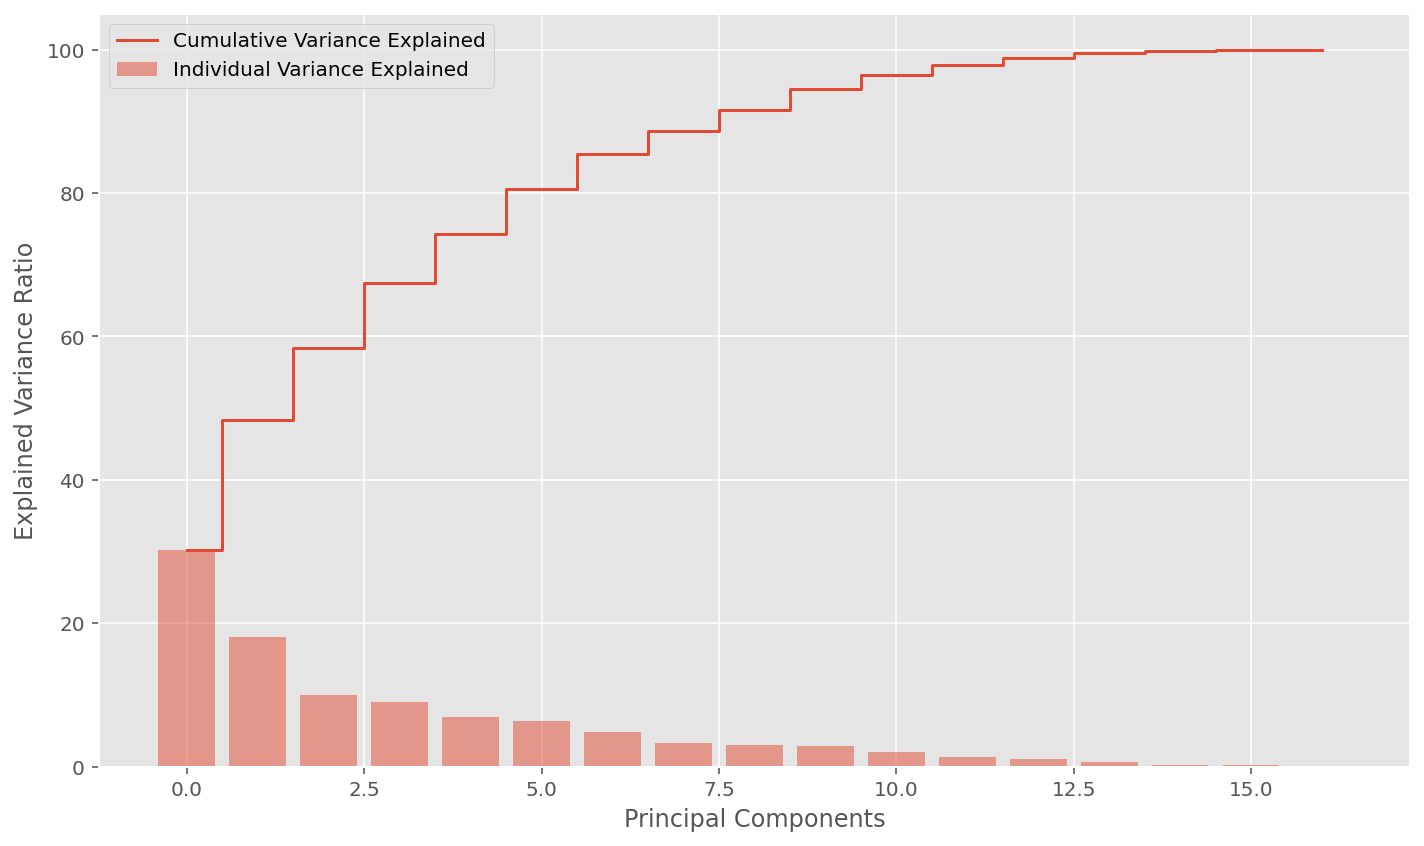

In [70]:
# Plotting the Summary Plot of the Cumulative Variance Explained:

plt.bar(range(17), exp_var, alpha=0.50, align = 'center', label='Individual Variance Explained')
plt.step(range(17), tot_var, where ='mid', label='Cumulative Variance Explained')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [71]:
pca_model = PCA(n_components = 17)
X_PCA = pca_model.fit_transform(concat_df)

In [72]:
# Cumulative Variance explained:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.3025572 , 0.48353757, 0.58409425, 0.67410005, 0.74320025,
       0.80615866, 0.85385643, 0.88648702, 0.91631607, 0.94460256,
       0.96446128, 0.97799846, 0.98893732, 0.99507642, 0.99775666,
       0.99969291, 1.        ])

In [73]:
# Cumulative Variance explains
var1 = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=6)*100)
var1

array([30.2557, 48.3537, 58.4094, 67.41  , 74.32  , 80.6158, 85.3856,
       88.6487, 91.6316, 94.4602, 96.4461, 97.7998, 98.8937, 99.5076,
       99.7756, 99.9692, 99.9999])

In [74]:
# Summary table showing the Eigen Vectors, Eigen Values and the variance explained by each of the component(eigenvector)

vec_val = pd.DataFrame({'Eigen_Values':pca_model.explained_variance_, 'Cumulative_Variance':var1}, 
                       index=range(1,18)).round(4)
vec_val

,Eigen_Values,Cumulative_Variance
1,4.3968,30.2557
2,2.6300,48.3537
3,1.4613,58.4094
4,1.3080,67.4100
5,1.0042,74.3200
6,0.9149,80.6158
7,0.6931,85.3856
8,0.4742,88.6487
9,0.4335,91.6316
10,0.4111,94.4602


### Conclusion:
1) From both manual computation of PCA components and PCA via sklearn we see that all the 17 components explain the amount of variance.

2) The number of components choosen are 7 that cumulatively explain 85% variation and each individual component explains more than 0.7 variance.

3) By considering the 7 dimensions out of the 17 variables we are losing only about 15% of the variation (information) of the data.

In [75]:
### PCA with 8 components:

PCA_7 = PCA(n_components=7)
X_PCA_7 = PCA_7.fit_transform(concat_df)

In [76]:
PC = pd.DataFrame(X_PCA_7, columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7'.split()])
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.963797,-1.466063,0.395737,0.147147,0.113362,-0.452822,-0.161024
1,-2.209442,0.931402,0.333874,-0.799582,-0.191202,-0.214703,0.703046
2,1.007415,-0.162731,0.841429,1.325162,-0.822963,2.170478,-1.088306
3,-0.866781,-0.770916,1.725054,0.148277,0.109396,-0.527342,-0.380985
4,-1.306443,-0.603864,0.469885,1.500899,0.189492,0.023789,0.418797
...,...,...,...,...,...,...,...
8944,1.055194,-1.518576,-1.542865,-0.646465,-0.416310,0.319131,0.680914
8945,0.739634,-1.224406,-1.556767,0.090250,0.053046,-0.007028,-0.533323
8946,0.427028,-1.622618,-0.976104,-0.482658,-0.177350,-0.023084,-0.129768
8947,-1.473409,-0.962832,0.786342,-0.353589,-0.230467,-0.234425,0.658129


In [77]:
# Taking out the list of columns:

list_cols = concat_df.columns

In [78]:
PC_with_all_variables = pd.DataFrame(PCA_7.components_.T, columns = ['PC_'+str(i) for i in range(1,8)], index = list_cols)
PC_with_all_variables

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
Installment_Purchases,0.021621,-0.096068,-0.167382,-0.081993,0.035790,-0.098499,0.024403
None_Of_the_Purchases,-0.111658,0.049028,0.056590,0.011716,0.038701,-0.079623,0.132863
One_Of_Purchase,-0.030272,-0.008406,0.146727,0.052925,-0.051245,0.102323,-0.051700
BALANCE_FREQUENCY,0.071734,0.291641,-0.320955,0.422057,-0.094484,0.296063,0.460078
ONEOFF_PURCHASES,0.302709,0.226554,0.462988,0.056258,-0.002324,-0.048950,0.082206
INSTALLMENTS_PURCHASES,0.327399,0.139030,-0.110014,-0.097894,0.209276,-0.473947,0.131399
PURCHASES_FREQUENCY,0.381713,-0.011713,-0.371278,-0.051380,-0.081538,0.246192,-0.227260
ONEOFF_PURCHASES_FREQUENCY,0.288618,0.156734,0.248066,0.116115,-0.227363,0.538702,-0.269548
PURCHASES_INSTALLMENTS_FREQUENCY,0.331829,-0.030934,-0.525154,-0.119609,0.063193,-0.064535,-0.145781
CASH_ADVANCE_FREQUENCY,-0.218531,0.460878,-0.071948,-0.218216,-0.045807,0.043832,-0.008001


In [80]:
# Variance explained by each of the Component:

pd.Series(PCA_7.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,8)])

PC_1    30.255720
PC_2    18.098037
PC_3    10.055668
PC_4     9.000580
PC_5     6.910020
PC_6     6.295841
PC_7     4.769777
dtype: float64

### Variable Reduction (Factor Analysis)
Using factor loadings finding out which of the variables have the maximum contirbution in each of the components.

Loadings are the correlation between the original variables and the unit-scaled components. We find the loadings by:

Loadings=Eigenvectors * sqrt(Eigenvalues)

This results in a loading matrix.

In [81]:
Loadings = pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T, index= list_cols,columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 PC17'.split()])

Loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Installment_Purchases,0.045337,-0.234129,-0.063475,0.150416,0.634734,0.686506,0.800394,0.605188,0.695793,-0.458226,-0.363837,0.799989,0.397881,0.781212,-0.345954,-0.277006,0.026433
None_Of_the_Purchases,-0.155796,0.079511,-0.013632,0.472963,0.367409,0.225470,-0.018996,0.254180,-0.050167,0.747419,0.731873,0.318451,-0.281613,0.383416,0.652968,0.520304,-0.056044
One_Of_Purchase,-0.202338,0.068408,0.177369,-0.387983,0.559677,-0.132989,-0.448815,0.299872,-0.634826,-0.086973,-0.111702,-0.003980,0.011179,0.378678,-0.053554,-0.187900,0.081477
BALANCE_FREQUENCY,-0.093772,0.013399,0.060529,0.482691,0.064340,-0.111957,-0.058762,0.132797,-0.136792,-0.249565,-0.384458,0.005601,-0.494393,-0.002493,-0.406731,0.569348,-0.248442
ONEOFF_PURCHASES,0.035864,0.038782,-0.051352,-0.094681,-0.002329,0.209712,-0.081708,-0.227836,0.063324,-0.045902,-0.080916,0.062850,-0.300698,0.084132,-0.053952,0.191233,0.856510
INSTALLMENTS_PURCHASES,-0.094216,-0.076160,0.097873,0.283187,-0.046821,-0.453336,0.235485,0.515274,-0.061728,0.041926,0.053425,-0.065455,0.167600,-0.225768,-0.005664,-0.075884,0.429228
PURCHASES_FREQUENCY,0.020317,0.110616,-0.043043,0.383040,0.068441,0.109397,-0.189206,-0.224413,-0.121370,-0.006661,-0.067098,-0.127673,0.587460,0.098056,-0.066537,0.157062,0.098556
ONEOFF_PURCHASES_FREQUENCY,0.145917,-0.044649,-0.058078,0.031971,0.360441,-0.346990,0.124928,-0.230718,0.189364,-0.049453,-0.025017,-0.222362,-0.068685,0.138047,0.123291,-0.000019,-0.000152
PURCHASES_INSTALLMENTS_FREQUENCY,0.036638,-0.031104,-0.003009,-0.359503,0.010052,-0.121312,0.074930,0.064939,0.052207,0.021556,0.021472,0.076626,0.219705,-0.041551,-0.048042,0.463820,-0.017563
CASH_ADVANCE_FREQUENCY,-0.023124,0.000096,0.023690,0.008576,-0.076290,0.052699,0.001043,0.067612,-0.042288,-0.234954,-0.267263,0.009204,0.023548,-0.027684,0.510362,0.080127,-0.001838


### Clustering

In [82]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

### Step 1: Finding the Cophenetic Distance Correlation Coefficient for different Linkages

In [83]:
for i  in ['single', 'complete', 'average']:
    print('Linkage is', i)
    for j in ['euclidean', 'cityblock', 'cosine']:
            Z= linkage(X_PCA_7, method = i , metric = j)
            c , coph_dist = cophenet(Z, pdist(X_PCA_7))
            print('Cophenetic Distance Correlation Coefficient for', j, 'distance is\t:', c)
    print()
    
Z= linkage(X_PCA_7, 'ward')
c , coph_dist = cophenet(Z, pdist(X_PCA_7))
print('Cophenetic Distance Correlation Coefficient for ward linkage is \t:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.7630936998688104
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.7516099250964812
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.033206735249084386

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.8032936953009638
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.8047821938260376
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.2689079454114124

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.8598689038991884
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.869806244869372
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.3398016312224922

Cophenetic Distance Correlation Coefficient for ward linkage is 	: 0.36198974080641494


### Step 2: Finding the Optimal clusters using K-Means, Silhouette Coefficient Score for both K-Means and Agglomerative Clustering

In [84]:
wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3,9):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_7)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_7, kmeans.labels_)
    sil_kmeans.append(sil_km)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, affinity = 'cityblock', linkage = 'average')
    agc.fit(X_PCA_7)
    sil_ag = silhouette_score(X_PCA_7, agc.labels_)
    sil_agc.append(sil_ag)
    
    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print('Silhouette Score for AGC(HCA):', sil_ag)
    print()

Number of clusters: 3
KMeans Inertia 74229.90795673929
Silhouette Score for KMeans: 0.24760963387482213
Silhouette Score for AGC(HCA): 0.8499511136280252

Number of clusters: 4
KMeans Inertia 63708.927715493825
Silhouette Score for KMeans: 0.26009644590950926
Silhouette Score for AGC(HCA): 0.8276634947082336

Number of clusters: 5
KMeans Inertia 55828.721256650955
Silhouette Score for KMeans: 0.28863159397567306
Silhouette Score for AGC(HCA): 0.7930548693789233

Number of clusters: 6
KMeans Inertia 48752.765867926646
Silhouette Score for KMeans: 0.28859339652894694
Silhouette Score for AGC(HCA): 0.7907514561247031

Number of clusters: 7
KMeans Inertia 42426.355717165265
Silhouette Score for KMeans: 0.3028164003309496
Silhouette Score for AGC(HCA): 0.7550012654147572

Number of clusters: 8
KMeans Inertia 38669.776973974826
Silhouette Score for KMeans: 0.3069207469609
Silhouette Score for AGC(HCA): 0.7545763220623827



In [85]:
from yellowbrick.cluster import SilhouetteVisualizer

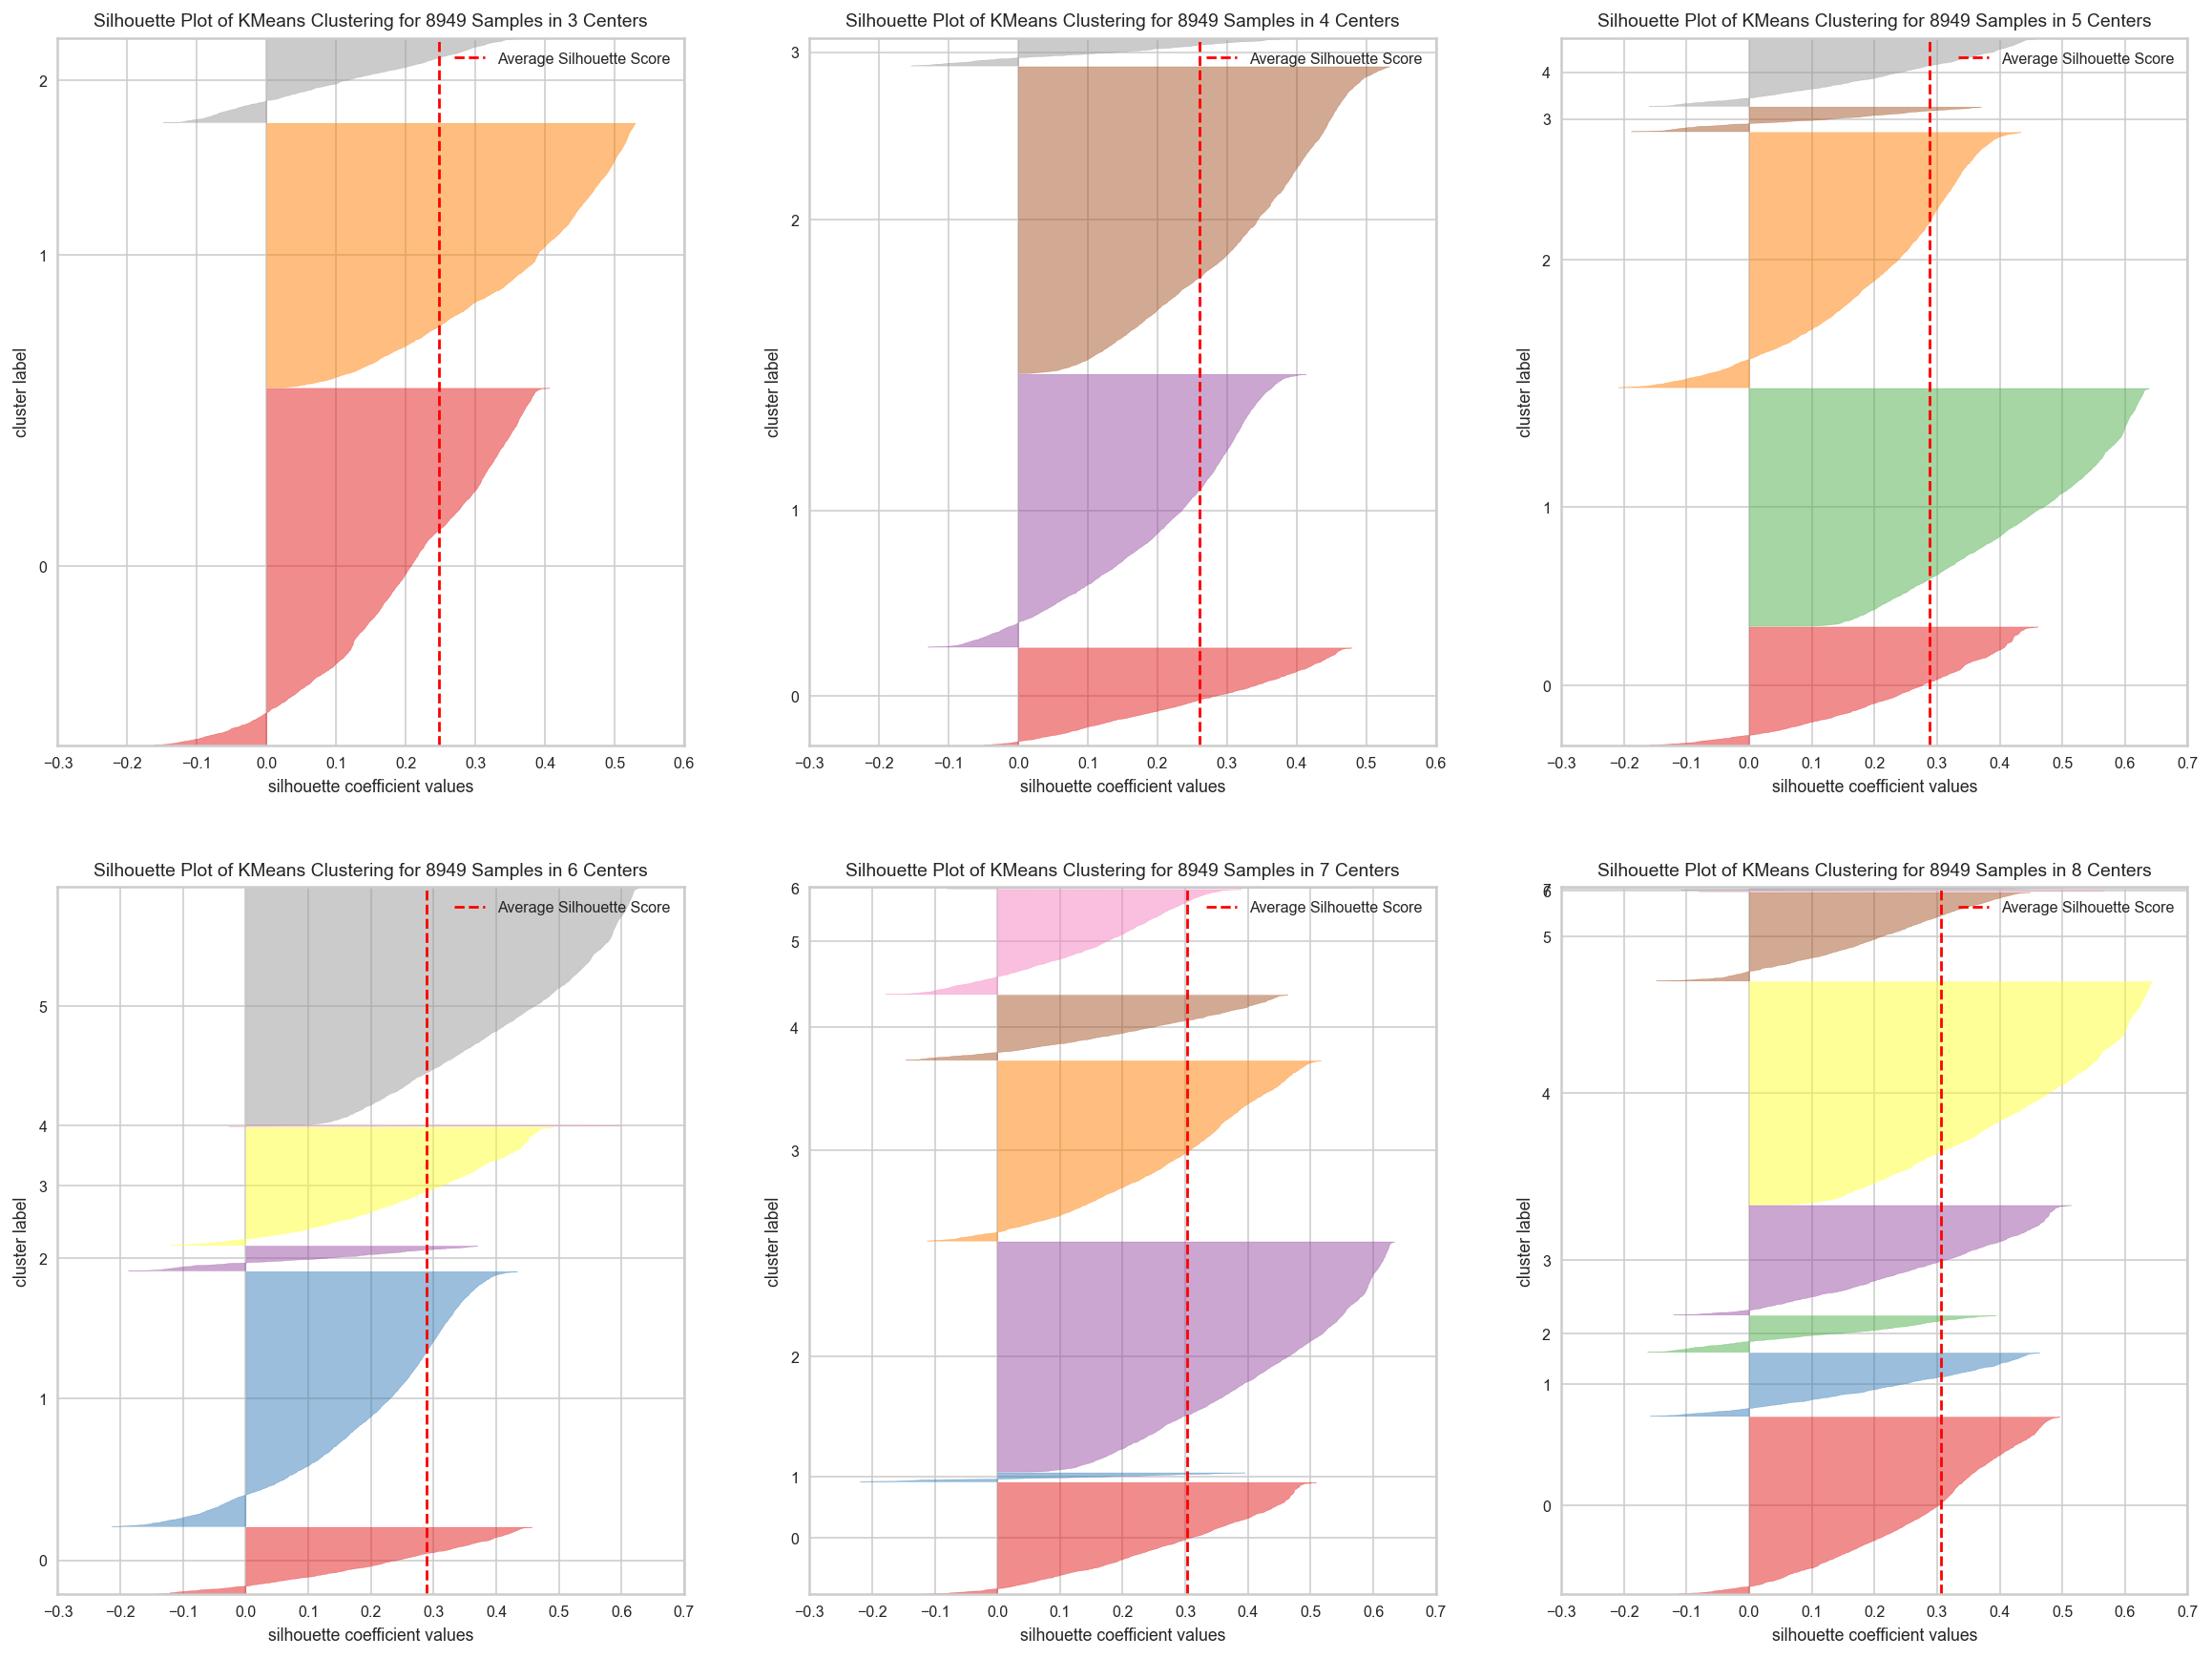

In [86]:
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X_PCA_7)
    sil.finalize()

In [87]:
KM_3 = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_5 = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_7 = KMeans(n_clusters = 7, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_8 = KMeans(n_clusters = 8, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)

In [88]:
# Appending the Cluster labels to the Original Data: (not to Standardized data)

original_df['cluster_3'] = KM_3.labels_
original_df['cluster_4'] = KM_4.labels_
original_df['cluster_5'] = KM_5.labels_
original_df['cluster_6'] = KM_6.labels_
original_df['cluster_7'] = KM_7.labels_
original_df['cluster_8'] = KM_8.labels_

In [89]:
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,7.950000,0.000000,0.040901,1.446508,0,2,0,3,0,3
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,536.912124,0.457495,3.826241,1,0,1,5,2,4
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,64.430833,0.000000,0.332687,0.991682,0,1,2,1,5,5
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,124.916667,17.149001,0.222223,0.000000,0,2,0,3,0,3
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,1.333333,0.000000,0.681429,2.771075,1,2,1,5,2,4


In [91]:
# Segment Distribution for cluster K = 5 :

pd.Series.sort_index(original_df.cluster_5.value_counts())/sum(original_df.cluster_5.value_counts())

0    0.167952
1    0.338362
2    0.363057
3    0.035088
4    0.095541
Name: cluster_5, dtype: float64

In [92]:
# Segment Distribution for cluster K = 6 :

pd.Series.sort_index(original_df.cluster_6.value_counts())/sum(original_df.cluster_6.value_counts())

0    0.095206
1    0.363057
2    0.035199
3    0.168175
4    0.000670
5    0.337691
Name: cluster_6, dtype: float64

In [93]:
# Segment Distribution for cluster K = 7 :

pd.Series.sort_index(original_df.cluster_7.value_counts())/sum(original_df.cluster_7.value_counts())

0    0.159124
1    0.012739
2    0.328305
3    0.256788
4    0.092636
5    0.149626
6    0.000782
Name: cluster_7, dtype: float64

In [94]:
# Segment Distribution for cluster K = 8 :

pd.Series.sort_index(original_df.cluster_8.value_counts())/sum(original_df.cluster_8.value_counts())

0    0.252654
1    0.090401
2    0.051961
3    0.156442
4    0.318136
5    0.126495
6    0.000782
7    0.003129
Name: cluster_8, dtype: float64

In [101]:
Profiling_output = pd.concat([original_df.apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
                original_df.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
                original_df.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [104]:
size=pd.concat([pd.Series(original_df.cluster_3.size), pd.Series.sort_index(original_df.cluster_3.value_counts()), pd.Series.sort_index(original_df.cluster_4.value_counts()),
           pd.Series.sort_index(original_df.cluster_5.value_counts()), pd.Series.sort_index(original_df.cluster_6.value_counts()),
           pd.Series.sort_index(original_df.cluster_7.value_counts()), pd.Series.sort_index(original_df.cluster_8.value_counts())])
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/original_df.cluster_3.size, columns=['Seg_Pct'])
Profiling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)
Profiling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)

# Adding column names

Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [105]:
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8949.000000,4532.000000,3357.000000,1060.000000,1235.000000,3470.000000,3902.000000,342.000000,1503.000000,3028.000000,...,1339.000000,7.000000,2261.000000,809.000000,465.000000,1400.000000,2847.000000,1132.000000,7.000000,28.000000
Seg_Pct,1.000000,0.506425,0.375126,0.118449,0.138004,0.387753,0.436026,0.038217,0.167952,0.338362,...,0.149626,0.000782,0.252654,0.090401,0.051961,0.156442,0.318136,0.126495,0.000782,0.003129
Installment_Purchases,0.252542,0.440865,0.072684,0.016981,0.087449,0.417291,0.178114,0.026316,0.383234,0.117239,...,0.000000,0.571429,0.611676,0.086527,0.017204,0.359286,0.101862,0.000000,0.571429,0.071429
None_Of_the_Purchases,0.228070,0.031333,0.565684,0.000000,0.486640,0.000000,0.369042,0.000000,0.180971,0.461361,...,0.000000,0.428571,0.000000,0.440049,0.000000,0.192857,0.495961,0.000000,0.428571,0.000000
One_Of_Purchase,0.209409,0.208738,0.252904,0.074528,0.208907,0.078386,0.337007,0.084795,0.314704,0.303501,...,0.241225,0.000000,0.000000,0.211372,0.038710,0.325714,0.290481,0.353357,0.000000,0.071429
BALANCE,1564.647593,669.867468,2505.536383,2410.477646,3755.901411,1010.750795,1204.628000,3379.325585,131.880265,1926.426037,...,1630.277117,1.796679,895.686742,3994.117399,3014.182039,128.684367,1961.584850,1252.578665,1.796679,5761.648320
BALANCE_FREQUENCY,0.877350,0.802715,0.944514,0.983745,0.964060,0.931314,0.792348,0.986515,0.419653,0.975861,...,0.975951,0.277597,0.951131,0.956198,0.988179,0.404336,0.975267,0.968010,0.277597,0.980195
PURCHASES,1003.316936,715.864870,221.965564,4706.835160,433.244040,1280.223424,287.451709,8419.926959,351.380546,257.371222,...,2742.596729,425.322857,902.694042,517.346947,5827.554925,323.344371,210.479730,1798.772032,425.322857,25651.435714
ONEOFF_PURCHASES,592.503572,327.620388,164.996965,3078.909491,283.660899,616.155450,226.532565,5643.285906,215.104458,206.382563,...,2025.479828,0.000000,174.469845,331.474944,3617.099032,207.605629,167.535975,1478.216466,0.000000,18455.715357
INSTALLMENTS_PURCHASES,411.113579,388.591401,57.121829,1628.491708,149.665466,664.411859,61.122035,2778.395439,136.473560,51.272880,...,717.116901,425.322857,728.619814,185.914920,2211.746215,115.950743,43.128746,320.850574,425.322857,7195.720357
